### S03T02 Visualització gràfica de Múltiples variables

### Exercici 1

+ **Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pywaffle import Waffle
from pySankey import sankey
%matplotlib inline
warnings.filterwarnings('ignore')

#### EXPLORING BIVARIATE VARIABLES WITH SCATTERPLOTS

Veurem la relació entre dos variables fent servir un Scatterplot, que ens ajuda a visualitzar aquesta relació cas per cas, ja sigui una tendència o una relació més complexa.

Per aquest exercici faré servir Seaborn. Primer carregarem la base de dades:

In [2]:
tips = pd.read_csv('tips.csv')
tips.shape

(244, 7)

Veiem que el dataset té 244 files i 7 columnes.

Mirem quantes dades faltants hi han:

In [3]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Veiem que no hi han dades faltants. 

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Podem fer una ullada al resum estadístic de les dades:

In [5]:
tips.describe().round(2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


Aquest resum ens diu que el valor mitjà del compte és 19,79 i el valor mitjà de la propina és 3. També ens descriu la variabliltat de les dades amb els valors dels quartils, la mediana i la desviació estàndar però entrarem en detall en aixó quan veiem els boxplots. 

Creem les dades per fer l'Scatterplot. Mirarem la relació entre la variable **tips** y la variable **total_bill.** 

<module 'matplotlib.pyplot' from 'C:\\Users\\eelee\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

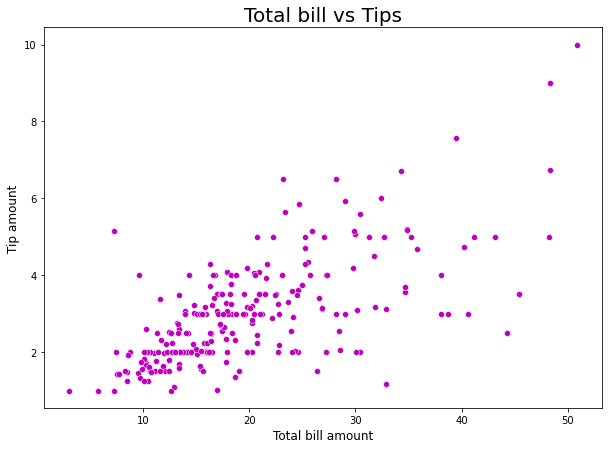

In [6]:
fig_dims = (10,7)
fig, ax = plt.subplots(figsize= fig_dims)
sns.scatterplot( x='total_bill', y='tip', data = tips, color= 'm', ax=ax)
plt.title('Total bill vs Tips', fontsize = 20)
plt.xlabel('Total bill amount', fontsize= 12)
plt.ylabel('Tip amount', fontsize= 12)
plt

Veiem que si que hi ha una certa relació entre l'import del compte i la propina. Podem mirar a veure quina es la correlació entre les dues observacions: 

In [7]:
tip = tips.tip
bill = tips.total_bill
correlation = bill.corr(tip)
correlation

0.6757341092113641

El resultat és una **correlació positiva de 67,5 %**, aixó ens indica que quan puja l'import del compte també puja l'import de les propines, pero la força d' aquesta **correlació és moderada.**

També podem fer una correlació de totes les columnes numèriques del dataframe. 

In [8]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Al scatterplot anterior també podem afegir una variable categòrica que ens separi les observacions, per exemple, per si són **pel dinar o pel sopar**. Ho faríem d'aquesta manera: 

<module 'matplotlib.pyplot' from 'C:\\Users\\eelee\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

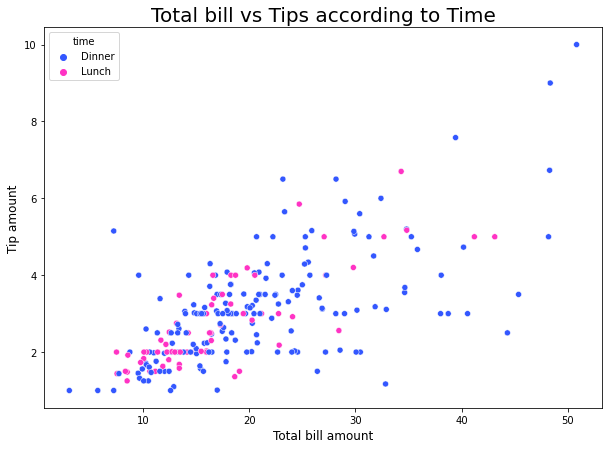

In [9]:
fig_dims = (10,7)
fig, ax = plt.subplots(figsize= fig_dims)
sns.scatterplot( x='total_bill', y='tip', hue='time',data = tips, palette=['#3357FF','#FF33C4'] ,ax=ax)
plt.title('Total bill vs Tips according to Time', fontsize = 20)
plt.xlabel('Total bill amount', fontsize= 12)
plt.ylabel('Tip amount', fontsize= 12)
plt

Veiem aquí les observacions separades per colors, rosa si son observacions de dinar i blau si són del sopar. **Visualment sembla que la correlació és més alta en els dinars que en els sopars**. Ho podem calcular així: 

In [10]:
# creem una copia del dataframe separant els dinars dels sopars 
tips_lunch = tips[tips['time'].isin(['Lunch'])].copy()
tips_dinner = tips[tips['time'].isin(['Dinner'])].copy()

In [11]:
tips_lunch.corr()

,total_bill,tip,size
total_bill,1.000000,0.805424,0.708662
tip,0.805424,1.000000,0.647854
size,0.708662,0.647854,1.000000


In [12]:
tips_dinner.corr()

,total_bill,tip,size
total_bill,1.000000,0.632871,0.557015
tip,0.632871,1.000000,0.428502
size,0.557015,0.428502,1.000000


Efectivament tal com veíem en el gràfic comprobem que la **correlació entre les propines i l'import del compte és més alta durant els dinars (80,5%) que durant els sopars (63,3%).** El scatterplot ens permet detectar aquestes relacions de forma senzilla.

Podem també distingir les observacions **segons el nombre de comensals**. En aques cas farem servir un scatterplot on el tamany del punts que representen les observacions es vagi fent més gran segons el nombre de comensals. 

<module 'matplotlib.pyplot' from 'C:\\Users\\eelee\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

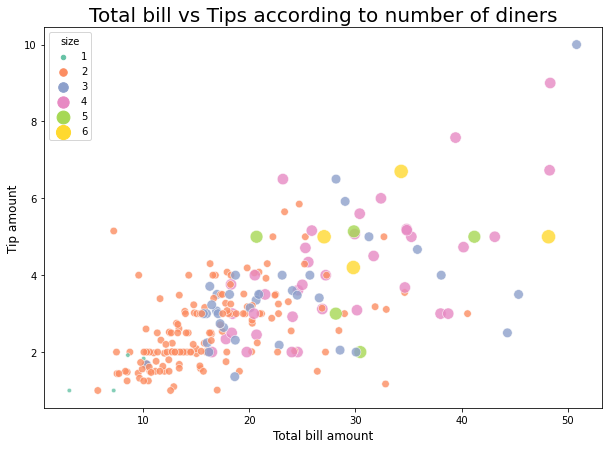

In [13]:
fig_dims = (10,7)
fig, ax = plt.subplots(figsize= fig_dims)
sns.color_palette("hls")
sns.scatterplot(
    data=tips, x="total_bill", y="tip", hue="size", size="size", 
    palette = sns.color_palette("Set2", len(tips['size'].unique())),
    sizes=(20, 200), legend="full", alpha = 0.8
)
plt.title('Total bill vs Tips according to number of diners', fontsize = 20)
plt.xlabel('Total bill amount', fontsize= 12)
plt.ylabel('Tip amount', fontsize= 12)
plt

 Podem mostrar els **tres gràfics de forma conjunta** fent servir el mètode subplot. 

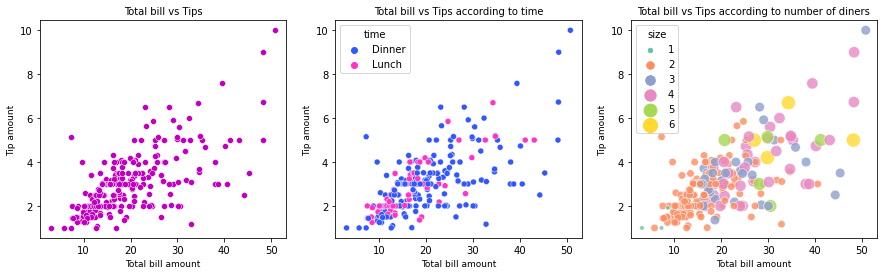

In [14]:
# generem un subplot amb una fila i tres columnes 
fig = plt.figure(figsize=(15,4))

#  subplot #1
plt.subplot(131)
plt.title('Total bill vs Tips', fontsize = 10)
plt.xlabel('Total bill amount', fontsize= 9)
plt.ylabel('Tip amount', fontsize= 9)
sns.scatterplot( x='total_bill', y='tip', data = tips, color= 'm')

#  subplot #2
plt.subplot(132)
plt.title('Total bill vs Tips according to time', fontsize = 10)
plt.xlabel('Total bill amount', fontsize= 9)
plt.ylabel('Tip amount', fontsize= 9)
sns.scatterplot( x='total_bill', y='tip', hue='time',data = tips, palette=['#3357FF','#FF33C4'])         

# subplot #3
plt.subplot(133)
plt.title('Total bill vs Tips according to number of diners', fontsize = 10)
plt.xlabel('Total bill amount', fontsize= 9)
plt.ylabel('Tip amount', fontsize= 9)
sns.color_palette("hls")
sns.scatterplot(
    data=tips, x="total_bill", y="tip", hue="size", size="size", 
    palette = sns.color_palette("Set2", len(tips['size'].unique())),
    sizes=(20, 200), legend="full", alpha = 0.8
)

plt.show()

#### MATRIX PLOTS 

Amb seaborn també podem fer un Matrix Plot, que ens genera automàticament diferents tipus de plots per cada variable, en aquest cas ens generará diferents plots entre les variables segons si es dinar o sopar i amb histogrames. És una forma de fer un resum visual entre les variables que ens pot ajudar a detectar patrons de relació: 

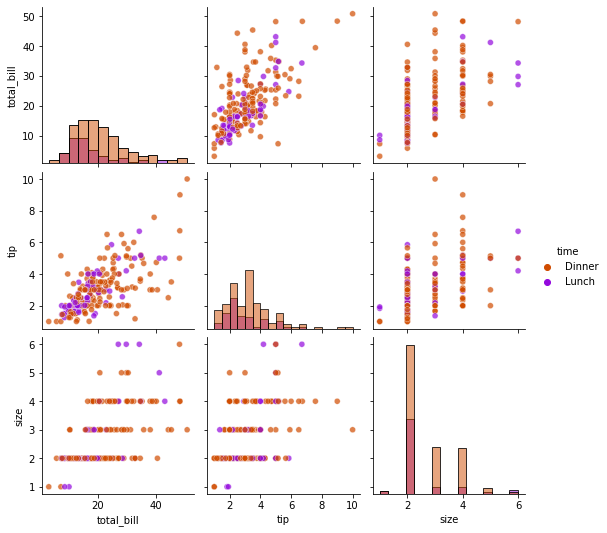

In [15]:
sns.pairplot(tips,   diag_kind='hist', plot_kws={'alpha': 0.7}, hue = 'time', palette='gnuplot_r')

Per exemple, gràcies a aixó a simple vista podem observar que els valors de l'import total del compte i de les propines són més alts durant els sopars que durant els dinars. Fem els càlculs a veure si efectivament és així: 

In [16]:
bill_dinner = round(tips_dinner.total_bill.mean(), 2)
bill_lunch = round(tips_lunch.total_bill.mean(), 2)
print("El valor mitjá del compte en els sopars és: ", bill_dinner)
print("El valor mitjá del compte en els dinars és: ", bill_lunch)

El valor mitjá del compte en els sopars és:  20.8
El valor mitjá del compte en els dinars és:  17.17


In [17]:
tip_dinner = round(tips_dinner.tip.mean(), 2)
tip_lunch = round(tips_lunch.tip.mean(), 2)
print("El valor mitjá de la propina en els sopars és: ", tip_dinner)
print("El valor mitjá de la propina en els dinars és: ", tip_lunch)

El valor mitjá de la propina en els sopars és:  3.1
El valor mitjá de la propina en els dinars és:  2.73


#### HISTOGRAMS 

Un histograma ens permet veure a simple vista com és la distribució d'una variable cuantitativa i continua, com pot ser l'import de la propina o del compte. Primer visualitzarem l'import de les propines: 

Text(0.5, 0, 'Tip amount')

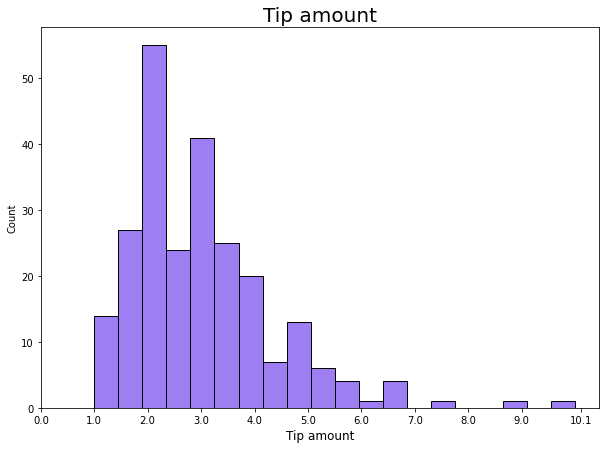

In [18]:
fig_dims = (10,7)
fig, ax = plt.subplots(figsize= fig_dims)
sns.histplot( data = tips, x = 'tip', color = '#7f52ef', bins=20)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10.11])
plt.title('Tip amount', fontsize = 20)
plt.xlabel('Tip amount', fontsize= 12)

Veiem que les dades tenen skew a la dreta, les dades estan mes acumulades als valors inferiors a 5. També veiem que es una distribució Biimodal, les propines més habituals són les que estan al voltant de 2 i 2,50 i entre 3 i 3,50.   

### SUMMARY STATISTICS

Si volem calcular els valors mitjans de ´les dades numèriques (ho redondejarem a 1): 

In [19]:
tips.describe().round(1)

,total_bill,tip,size
count,244.0,244.0,244.0
mean,19.8,3.0,2.6
std,8.9,1.4,1.0
min,3.1,1.0,1.0
25%,13.3,2.0,2.0
50%,17.8,2.9,2.0
75%,24.1,3.6,3.0
max,50.8,10.0,6.0


Veiem que l'import mitjà del compte és 19.80, del tips es 3 i el tamany mitjà dels comensals entre 2 i 3. Per fer els càlculs dels valors mitjans es sumen totes les observacions i es divideixen pel nombre d'observacions. **El valor mitjà , ens informa del valor que obtindria cada observació si els valors fosin distribuits en parts iguals.**

#### Variance and Standard Deviation

A mès del valor mitjà també és important **tenir en compte la variabilitat de les dades.** Per aixó existeixen dos mesures molt últils: Variança i Desviació Estandar.

La variança és la distància mitjana al quadrat de les dades respecte a la mitja. Per poder fer-la servir per medir la distància dels valors amb la mitjana podem fer el càlcul de la seva arrel quadrada i ja tindríem la desviació estàndar, que ens ajuda a descriure la variabilitat de les dades. 

Anem a veure un exemple amb l´histograma de l'import total del compte: 

<module 'matplotlib.pyplot' from 'C:\\Users\\eelee\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

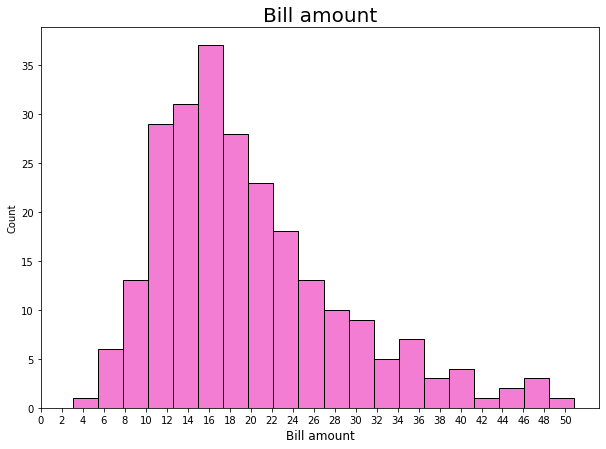

In [20]:
list = []
for i in range(0,51,2): 
    list.append(i)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize= fig_dims)
sns.histplot( data = tips, x = 'total_bill', color = '#ef52c3', bins=20)
plt.title('Bill amount', fontsize = 20)
plt.xlabel('Bill amount', fontsize= 12)
plt.xticks(list)
plt

Veiem una distribució unimodal i també amb skew a la dreta. Com hem vist a la descripció estadística, l'import mitjà del compte es 19,8 i la mediana és 17,80  (aixó ens diu que el valor mitjà és més susceptible als valors extrems que la mediana). Segons el gràfic observem que les **observacions més freqúentes es troben entorn a un import de 16.** 

Veiem que les dsitribucions de l'import dels tips i de l'import del compte són semblants. Les podem mostrar juntes per veure-ho millor.  

<AxesSubplot:title={'center':'Bill amount'}, xlabel='Bill amount', ylabel='Count'>

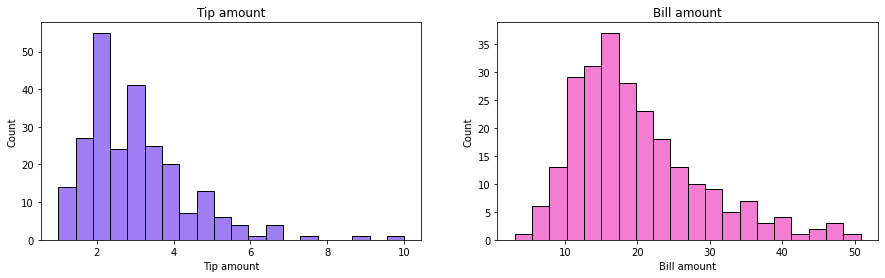

In [21]:
fig = plt.figure(figsize=(15,4))

plt.subplot(121)
plt.title('Tip amount', fontsize = 12)
plt.xlabel('Tip amount', fontsize= 10)
sns.histplot( data = tips, x = 'tip', color = '#7f52ef', bins=20)

plt.subplot(122)
plt.title('Bill amount', fontsize = 12)
plt.xlabel('Bill amount', fontsize= 10)
sns.histplot( data = tips, x = 'total_bill', color = '#ef52c3', bins=20)

Si mirem la mitjana +- la desviació estàndar: 

In [22]:
tips.tip.mean() - tips.tip.std()

1.6146404995234076

In [23]:
tips.tip.mean() + tips.tip.std()

4.381916877525773

En el cas de  les propines, veiem que la majoria de dades se situen entre 1.6 i 4.4. 

In [24]:
tips.total_bill.mean() - tips.total_bill.std()

10.883530668093968

In [25]:
tips.total_bill.mean() + tips.total_bill.std()

28.68835457780768

En el cas de l'import del compte, veiem que la observació típica se situa entre un import de 10,9 i 28,7. 

#### BOXPLOTS    

El gràfic de boxplot ens serveix per resaltar quina és la distribució de les dades, dividint-les en quatre parts (quartils) i representant també els valors màxims i mínims. Començem mirant quina és la mediana en el nostre dataset: 

In [26]:
tips.median()

total_bill    17.795
tip            2.900
size           2.000
dtype: float64

La mediana divideix les observacións pel 50%, la meitat de les observacions serien per sota de la mediana i l'altra meitat per sobre. Si ordenem les observacions i observem els valors del mig de al taula: 

In [27]:
sorted_tips = tips.sort_values(by=['tip'])
sorted_tips[121:123]

,total_bill,tip,sex,smoker,day,time,size
229,22.12,2.88,Female,Yes,Sat,Dinner,2
119,24.08,2.92,Female,No,Thur,Lunch,4


La mediana és la mitjana de les dos observacions centrals(perque el nombre d'observacions en aquest cas és parell). Seria: 

$(2,88+2,92)/2 = 2,90$

És el centre de les dades. Podem veure-ho en un boxplot dela variable **tip**, on la **mediana ve representada per una línea.**

Text(0.5, 1.0, 'Tip Boxplot')

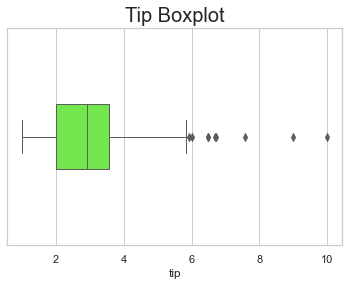

In [28]:
sns.set(style= "whitegrid")
sns.boxplot(x = tips['tip'], color = '#65FF33', fliersize= 5, orient = 'v', linewidth= 1, width = 0.3)
plt.title('Tip Boxplot', fontsize = 20)

Veiem que la **linea del boxplot queda en torn al valor 2.90 que hem calculat.**

Si afegim un **stripplot** al boxplot veiem on se situa cada observació individual:  

Text(0.5, 1.0, 'Tip Boxplot with individual observations')

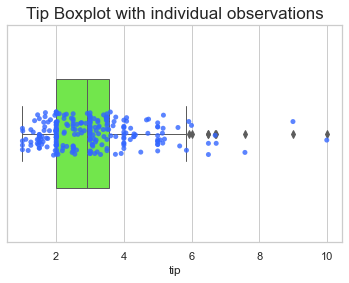

In [29]:
sns.set(style= "whitegrid")
sns.stripplot(x=tips['tip'], orient='v', color='#3366FF', alpha= 0.8)
sns.boxplot(x = tips['tip'], color = '#65FF33', fliersize= 5, orient = 'v', linewidth= 1, width = 0.5)
plt.title('Tip Boxplot with individual observations', fontsize = 17)

Un altre factor en el boxplot es el tamany de la caixa, que representa el 50% de les dades. La llargada de la caixa representa la distància entre el primer quartil i el tercer(Q3-Q1) i s'anomena rang interquartil (IQR). És un altra mesura de la variabilitat de les dades. 

Les línees o bigotis que surten de la capsa es diuen whiskers i serveixen per reflexar les dades fora de la caixa, i poden tenir un tamay màxim de 1,5* IQR. En el nostre gràfic, el whisker inferior no arriba a la llargada màxima i es deté en els valors més baixos, mentre que el whisker superior no arriba als valors màxims 


En el nostre cas, **IQR = 2.34, 3.56+2.34 = 5.9**, veiem que encara que hi han dades més enllà d'aquests valors, la llargada màxima de 5.9 es compleix. A les dades que estan més enllà d'aquests valors les anomenem **valors atípics o outliers.**, i en tenim en les nostres dades uns quants, sent el màxim valor de propina igual a 10. 

Ara farem un boxplot i un **swarmplot** (semblant al stripplot pero evita que els punts se superposin) que representi la distribució de l'import total del compte. Aquest cop farem la orientació vertical per veure-ho diferent i revisarem la variable **total_bill** en comptes de tip.  

Text(0.5, 1.0, 'Total Bill boxplot with individual observations')

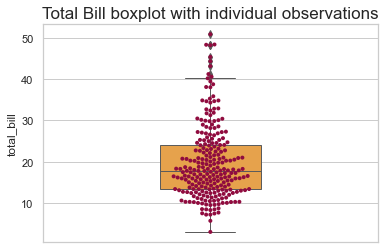

In [30]:
sns.boxplot(y="total_bill", data=tips,  color='#FFA533', fliersize=5,  orient='v', linewidth=1 , width=0.3)
sns.swarmplot(y="total_bill", data=tips, color="#900C3F", orient="v", size=4)
plt.title('Total Bill boxplot with individual observations', fontsize = 17)

In [31]:
round(tips.total_bill.median(), 1)

17.8

Mirant el boxplot podem confirmar que la mediana es troba en torn al 17.80. Els valors sembla que es troben **més concentrats per sota de la mediana que per sobre, on estan més dispersos,**  cosa que ja havíem vist quan hem mirat l'skew de la distribució. 

Podem ara comparar si canvia la distribució de les dades segons el dia de la setmana fent un gràfic amb diferents boxplot de la columa tip: 

Text(0.5, 1.0, 'Tips Boxplots per Weekday')

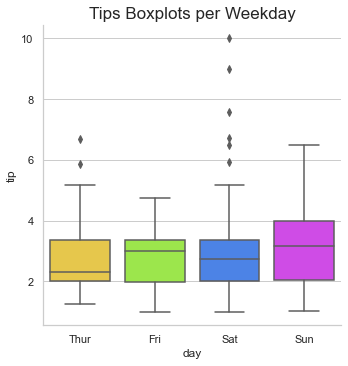

In [32]:
sns.catplot(x= 'day', y = 'tip', kind='box', data= tips,palette=['#FFD633','#9DFF33','#337CFF', '#E133FF'], 
           order = ['Thur', 'Fri', 'Sat', 'Sun'])
plt.title('Tips Boxplots per Weekday', fontsize = 17)

Comparant aquests boxplots, sembla que el disssabte és el dia que tenim més valors atípics en el import de les propines i que el dijous la mediana és una mica més baixa. Les dades del diumenge mostren més dispersió que les de la resta de dies. 

Ara calcularem las propines per dia de la setmaana i **dividirem en dos grups: fumadors i no fumadors**. A més en comptes de mesurar l'import de la propina **mirarem el percentatge de propina sobre el valor total del compte**.

<AxesSubplot:xlabel='day', ylabel='tip_percent'>

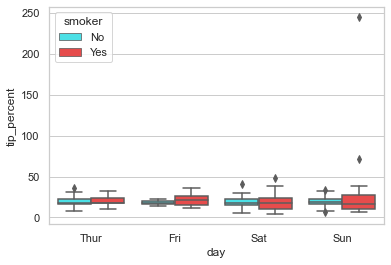

In [33]:
# creen una nova columna amb els percentatges de la propina sobre l'import total 
tips['tip_percent'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)

sns.boxplot( x = 'day', y= 'tip_percent', hue = 'smoker', data = tips, palette = ['#33F7FF', '#FF3333'],
            order = ['Thur', 'Fri', 'Sat', 'Sun'])

Treurem la dada atípica del diumenge per veure millor les distribucions: 

Text(0.5, 1.0, 'Tips Percentage per Weekday')

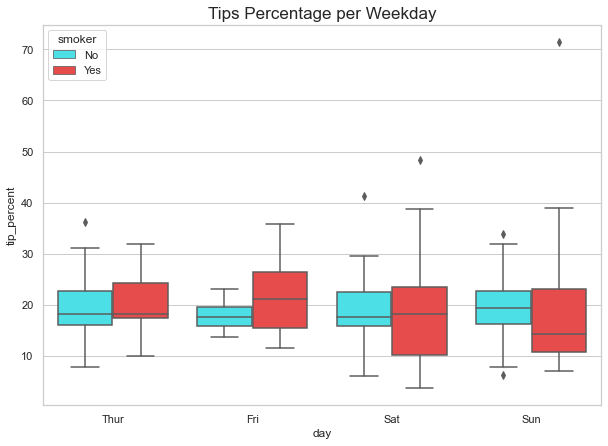

In [34]:
fig_dims = (10,7)
fig, ax = plt.subplots(figsize= fig_dims)

sns.boxplot( x = 'day', y= 'tip_percent', hue = 'smoker', data = tips[tips.tip_percent < 240 ], 
            palette = ['#33F7FF', '#FF3333'], order = ['Thur', 'Fri', 'Sat', 'Sun'])
plt.title('Tips Percentage per Weekday', fontsize = 17)

En general veiem que el percentatge de propina sobre el total del compte és més concentrat en el cas dels no fumadors i tenen més dispersió en el cas dels fumadors. 

Si afegim un stripplot que ens separi les dades entre els dinars i els sopars tindrem: 

Text(0.5, 1.0, 'Tips Percentage per Weekday and Time')

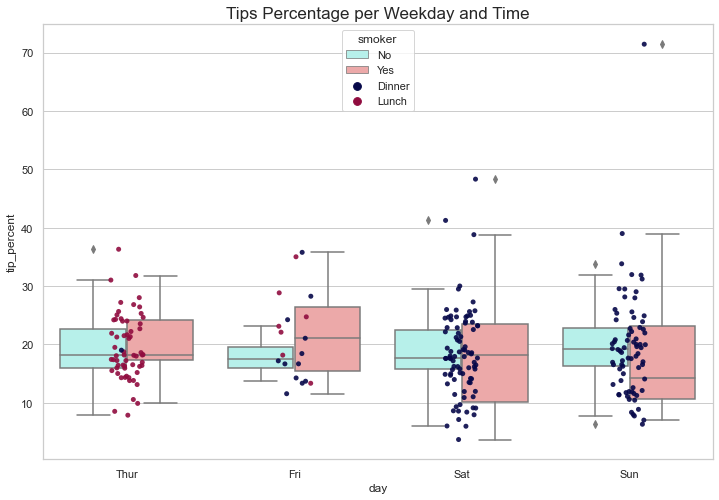

In [35]:
fig_dims = (12,8)
fig, ax = plt.subplots(figsize= fig_dims)
sns.stripplot(x = 'day', y = 'tip_percent', hue= 'time', data = tips[tips.tip_percent < 240], orient = 'v',
              palette = ['#060849', '#900C3F'],order = ['Thur', 'Fri', 'Sat', 'Sun'] ,alpha = 0.9)
sns.boxplot( x = 'day', y= 'tip_percent', hue = 'smoker', data = tips[tips.tip_percent < 240 ], 
            palette = ['#AEF9F1', '#F79E9E'], order = ['Thur', 'Fri', 'Sat', 'Sun'], )
plt.legend(title = 'smoker',loc='upper center')
plt.title('Tips Percentage per Weekday and Time', fontsize = 17)

Es veu que el dissabte i el diumenge no hi han dinars i en general dades semblen més disperses el cap de setmana. 

Un altre gràfic que tenim disponible amb seaborn és el **factorplot(),** que ens permetre comparar visualment variables categòriques. Podem comparar per exemple ara l'**import de la propina segons el nombre de comensals i el sexe.**

Text(0.5, 1.0, 'Total tips depending on diners and gender')

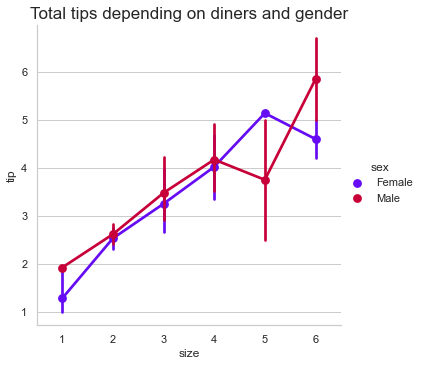

In [36]:
sns.factorplot(x ='size', y ='tip', palette = ['#650CF4', '#C70039'], 
               hue = 'sex', data = tips)
plt.title('Total tips depending on diners and gender', fontsize = 17)

Observem que el preu de la propina puja segons el nombre de comensals i que el comportament dels dos grups (homes i dones) és semblant, sent les dades pels homes una mica més disperses (les línees que surten dels punts són més llargues).

Un altra gràfica que ens es d'ajut es el **plot de violí**, que ens representa la distribució de les dades pero tenit en compte també la seva densitat. Incluirem també un swarmplot per veure cada observació individual a la vegada que veiem la distribució. Fem el mateix que a dalt a veure que veiem: 

Text(0.5, 1.0, 'Total tips depending on diners and gender')

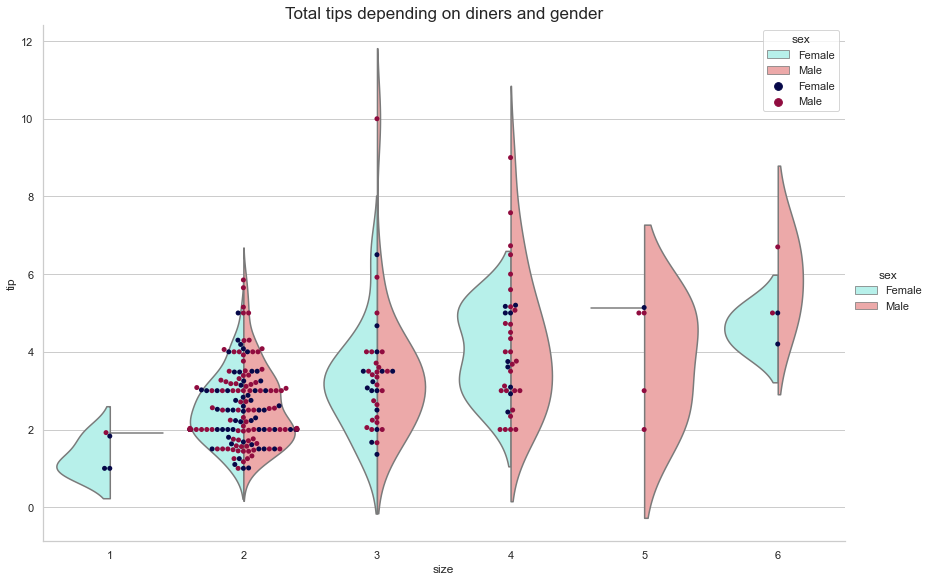

In [37]:

g = sns.catplot(x="size", y="tip", kind="violin", hue= 'sex', split= True,  palette = ['#AEF9F1', '#F79E9E'], 
                inner=None, data=tips, height=8, aspect=12/8)
sns.swarmplot(x="size", y="tip", color="k", size=5, hue= 'sex' ,data=tips,  
               palette = ['#060849', '#900C3F'],ax=g.ax)
plt.title('Total tips depending on diners and gender', fontsize = 17)

En aquest gràfic encara veiem més clarament el que comentàvem en el gràfic anterior del factorplot que la distribució en el cas d'homes es més dispersa i en dones més concentrada. 

Un altra visualització que podem fer és mitjançant el paràmetre **col**, que ens permet comparar dos situacions segons una de les variables. Mirarem ara una gràfica de violí **comparant l'import de les propines, dia de la setmana i hora del menjar segons si és fumador o no:**

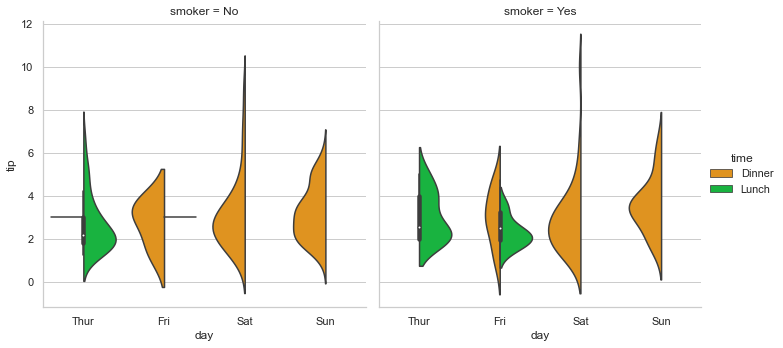

In [38]:
sns.catplot(x='day', y='tip', hue='time', col='smoker', kind='violin', split = True
               , data=tips,palette = ['#ff9900', '#00cc33'], order = ['Thur', 'Fri', 'Sat', 'Sun'])

 Veiem que la distribució de les dades és molt semblant en el cas dels fumadors i no fumadors, encara que en algun dels casos tenim poques observacions per poder fer comparacions (no tenim gaires observacions de dinar el divendres per no fumadors ni de sopars els dijous). Si fem: 

In [39]:
tips.groupby('day')['time'].value_counts()

day   time  
Fri   Dinner    12
      Lunch      7
Sat   Dinner    87
Sun   Dinner    76
Thur  Lunch     61
      Dinner     1
Name: time, dtype: int64

Veiem que efectivament hi ha alguns periodes de temps en els que no consten gaires dades. 

###  Exercici 2

* **Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat**

In [40]:
# elegim el nom de les columnes 
column_names = ['id', 'title', 'genre']
df_movies = pd.read_table('movies.dat', header = None, sep = "::", names= column_names, engine = 'python', 
                       encoding = "ISO-8859-1")
df_movies

,id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


El primer que visualitzarem és el nombre de películes per any, haurem de arreglar una mica les dades per poder fer-ho. 

In [41]:
# extraiem l' any del títol i creem una nova columna per l' any
df_movies['year'] = df_movies['title'].str.extract(r"\(([0-9]+)\)", expand=False).copy()
# esborrem l´any del títol 
df_movies['title'] = df_movies.title.str.replace('(\(\d\d\d\d\))', '').copy()

In [42]:
df_movies.dtypes

id        int64
title    object
genre    object
year     object
dtype: object

Ara convertirem la columna 'year' en int ja que actualment les dades son de tipus string. 

In [43]:
df_movies['year'] = df_movies['year'].astype(int).copy()

In [44]:
df_movies.head()

,id,title,genre,year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


Primer mirem si tenim dades faltants: 

In [45]:
df_movies.isnull().sum()

id       0
title    0
genre    0
year     0
dtype: int64

Ja podem mirar quantes **películes per any tenim en aquest datataset**. Farem servir un histograma amb Seaborn: 

Text(0, 0.5, 'Total number of films')

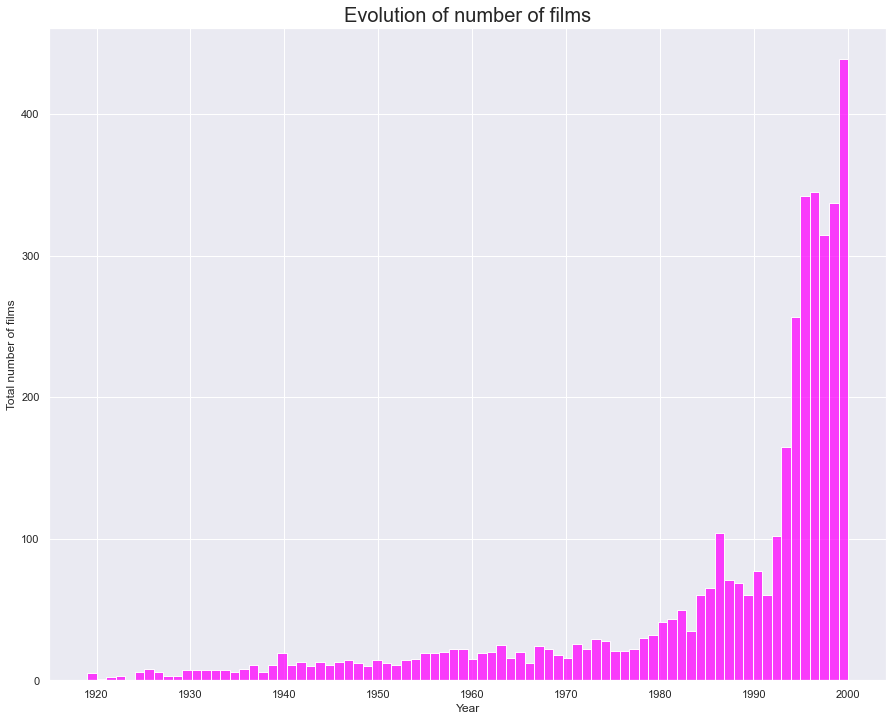

In [46]:
sns.set(style="darkgrid")
fig_dims = (15, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot( x = df_movies['year'], color = 'magenta', bins=80)
plt.title('Evolution of number of films', fontsize = 20)
plt.xlabel('Year', fontsize= 12)
plt.ylabel('Total number of films', fontsize= 12)

Veiem que la distribució té un **skew molt marcat a l'esquerra**, encara que la tendéncia es que el número de películes per any va pujant, aquesta tendència és molt més marcada a partir de mitjans dels 90. Si fem: 

In [47]:
df_movies.year.median()

1994.0

La **mediana és a 1994, aixó vol dir que la meitat de les películes estan per sota d'aquest any** i l'altra meitat per sobre. Ho podem mirar amb un boxplot (farem també un swarmplot per veure cada observació individual): 

Text(0.5, 1.0, 'Number of movies per year')

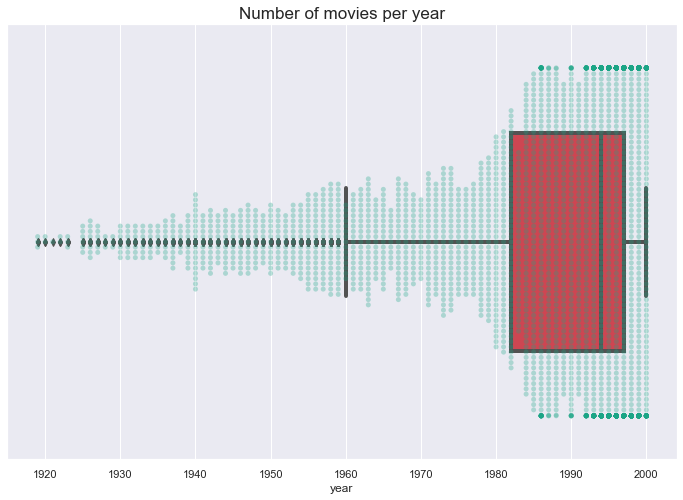

In [48]:
fig_dims = (12,8)
fig, ax = plt.subplots(figsize= fig_dims)
sns.swarmplot(x=df_movies['year'], orient='v', color='#1ba586', alpha= 0.3)
sns.boxplot(x = df_movies['year'], color = '#e42f3f', fliersize= 5, orient = 'v', linewidth= 4, width = 0.5)
plt.title('Number of movies per year', fontsize = 17)

Tal com havíem calculat, la mediana que ve representada per la línea del boxplot està sitiuada en torn l'any 1994. 

També podem veure quantes películes per any tenim de mitjana si fem: 

In [49]:
movies_per_year = df_movies.groupby('year').size()
movies_per_year.describe().round(1)

count     81.0
mean      47.9
std       81.8
min        1.0
25%       11.0
50%       19.0
75%       35.0
max      345.0
dtype: float64

Veiem que el dataset es composa de dades de 81 anys, amb una mitjana de 47,9 películes per any, sent el nombre màxim de películes per any 345 i el mínim 1. Pel 75% d'anys tenim més de 35 películes representades. El 25% d´anys tenen una representació de menys de 11 películes. 

Ara mirarem quins gèneres tenen més representació, com el gènere està dividit per vàries categories posades de forma conjunta i desordenanda els separarem per varies columnes, indicant les caegories del gènere: categoria 1, categoria 2, etc..

In [50]:
# separem les columnes pel símbol | 
genres =df_movies['genre'].str.split('|', expand = True)
# canviem el nom de les noves columnes 
mapping = {genres.columns[0]: 'cat1', genres.columns[1]: 'cat2', genres.columns[2]: 'cat3', 
          genres.columns[3]: 'cat4', genres.columns[4]: 'cat5', genres.columns[5] : 'cat6'}
new_genres = genres.rename(columns = mapping)
new_genres.head()

,cat1,cat2,cat3,cat4,cat5,cat6
0,Animation,Children's,Comedy,None,None,None
1,Adventure,Children's,Fantasy,None,None,None
2,Comedy,Romance,None,None,None,None
3,Comedy,Drama,None,None,None,None
4,Comedy,None,None,None,None,None


In [51]:
# juntem ara el nou dataframe amb el que ja teníem
movies= pd.concat([df_movies, new_genres], axis = 1 )
movies.head()

,id,title,genre,year,cat1,cat2,cat3,cat4,cat5,cat6
0,1,Toy Story,Animation|Children's|Comedy,1995,Animation,Children's,Comedy,None,None,None
1,2,Jumanji,Adventure|Children's|Fantasy,1995,Adventure,Children's,Fantasy,None,None,None
2,3,Grumpier Old Men,Comedy|Romance,1995,Comedy,Romance,None,None,None,None
3,4,Waiting to Exhale,Comedy|Drama,1995,Comedy,Drama,None,None,None,None
4,5,Father of the Bride Part II,Comedy,1995,Comedy,None,None,None,None,None


In [52]:
movies.shape

(3883, 10)

Ara ja podem fer un anàlisi dels gèneres més comuns en les películes. **Per aquest anàlisi només tindrem en compte la categoria 1 del gènere**, que és la única categoria que conté dades per totes les películes. Més endavant ja evaluarem les altres categories de gènere. 

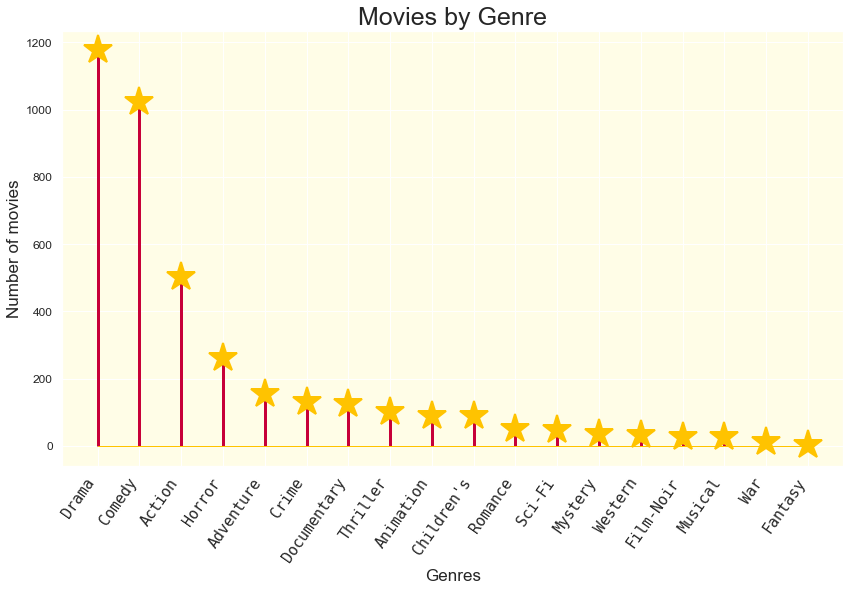

In [53]:
genres = movies.cat1.value_counts()

my_range=range(0,len(genres.index))


fig_1 = plt.figure(figsize=(14,8))
ax = plt.axes()
ax.set_facecolor('#FFFDE7')
(markers, stemlines, baseline) = plt.stem(genres.values)
plt.setp(markers, marker='*', markersize=30, markeredgecolor="#FFC300", c = "#FFC300",  markeredgewidth=2)
plt.setp(baseline, linestyle="-", color="#FFC300", linewidth=1)
plt.setp(stemlines, linestyle="-", color='#C70039', linewidth=3 )
plt.xticks( my_range, genres.index)
plt.title('Movies by Genre', fontsize = 25)
plt.xlabel('Genres', fontsize = 17)
plt.ylabel('Number of movies', fontsize = 17)
plt.xticks(ha='right', rotation=55, fontsize=15, fontname='monospace')
plt.yticks(fontsize= 12)
plt.show()

Veiem que els generes mes habituals en la primera opció son **Drama, Comèdia y Acció**. Ara veurem com han anat cambiant al llarg dels anys:

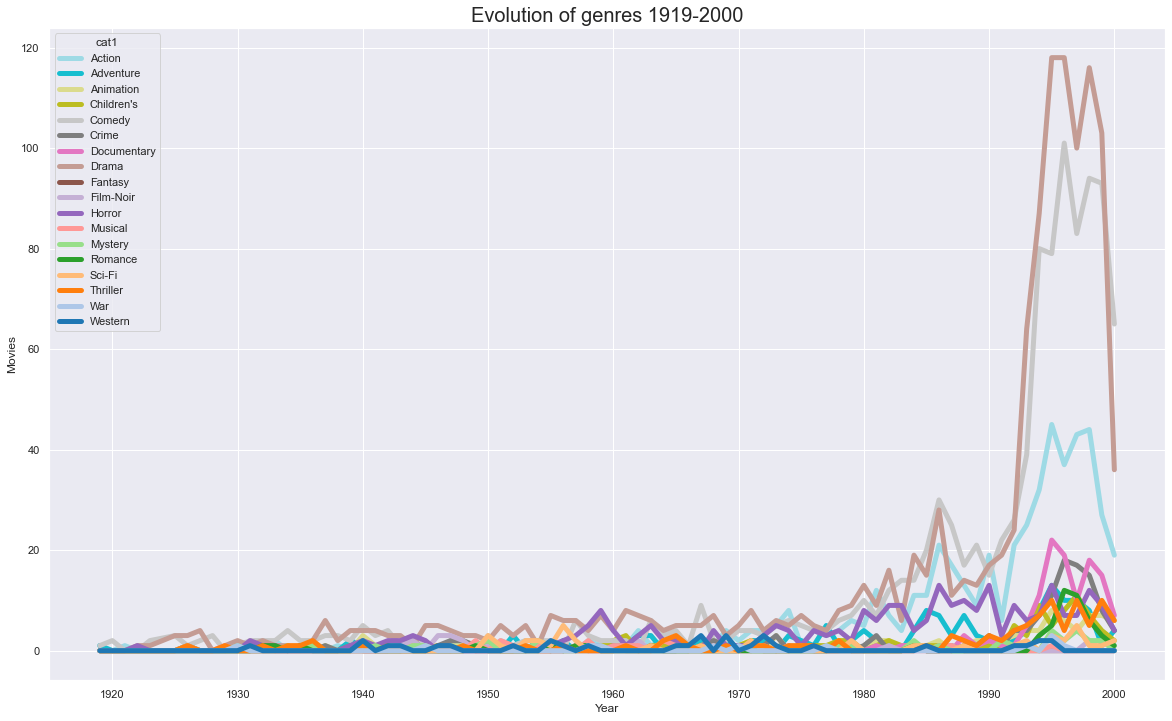

In [54]:
# agrupem les pelicules per cat1 de gènere i any 
group = movies.groupby(['year', 'cat1']).size()

cmap = plt.get_cmap('tab20')
clrs = cmap(np.linspace(1, 0, 18)) 

group.unstack(fill_value = 0).plot( figsize= (20,12), linewidth = '5', color = clrs)
plt.xlabel('Year', fontsize = 12)
plt.ylabel ('Movies', fontsize = 12)
plt.title('Evolution of genres 1919-2000', fontsize = 20)
plt.show()

Encara que seguim veient que a partir dels 90 Drama, Comèdia i Acció són els generes més habituals, pels anys anteriors no podem veure tan clarament la informació degut a la diferència de tamanys de la mosta, per aixó **dividirem els anys en periodes per veure millor la evolució.** 

Tenint en compte que el tamany de les observacions no és lineal en el temps, agafarem **periodes més grans pels anys on tenim menys representacions**. Formarem 6 grups, ho farem d'aquesta manera:  

In [55]:
def periods(x): 
    if x < 1935: 
        return '1919-1934'
    elif x < 1950: 
        return '1935-1949'
    elif x < 1965: 
        return '1950-1964'
    elif x < 1980: 
        return '1965-1979'
    elif x < 1990: 
        return '1980-1989'
    else: 
        return '1990-2000'
movies['period'] = movies['year'].apply(periods)
movies.head()

,id,title,genre,year,cat1,cat2,cat3,cat4,cat5,cat6,period
0,1,Toy Story,Animation|Children's|Comedy,1995,Animation,Children's,Comedy,None,None,None,1990-2000
1,2,Jumanji,Adventure|Children's|Fantasy,1995,Adventure,Children's,Fantasy,None,None,None,1990-2000
2,3,Grumpier Old Men,Comedy|Romance,1995,Comedy,Romance,None,None,None,None,1990-2000
3,4,Waiting to Exhale,Comedy|Drama,1995,Comedy,Drama,None,None,None,None,1990-2000
4,5,Father of the Bride Part II,Comedy,1995,Comedy,None,None,None,None,None,1990-2000


Mirarem els **5 gèneres que més es repeteixen en cada periode:**

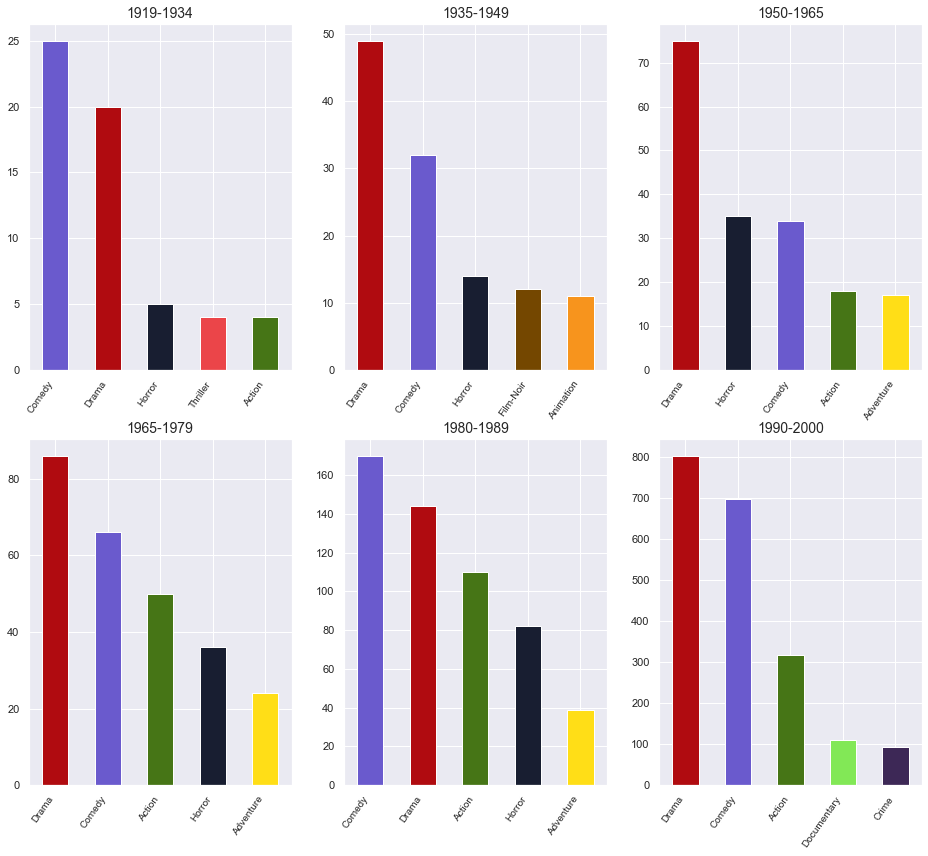

In [56]:
fig = plt.figure(figsize=(16,14))

plt.subplot(2, 3, 1)
# preparem les dades
df1919 = movies[movies['period'] == '1919-1934']
data1919 = df1919['cat1'].value_counts()
data1919[:5].plot.bar(color= ['#6a5acd', '#b00b10', '#181e31', '#eb4549', '#467516'  ])
plt.xticks(ha='right', rotation=55, fontsize=10)
plt.title('1919-1934', fontsize = 14)

plt.subplot(2, 3, 2)

df1935 = movies[movies['period'] == '1935-1949']
data1935 = df1935['cat1'].value_counts()
data1935[:5].plot.bar(color= ['#b00b10','#6a5acd', '#181e31', '#744700', '#f7941d' ])
plt.xticks(ha='right', rotation=55, fontsize=10)
plt.title('1935-1949', fontsize = 14)

plt.subplot(2, 3, 3)


df1950 = movies[movies['period'] == '1950-1964']
data1950 = df1950['cat1'].value_counts()
data1950[:5].plot.bar(color= ['#b00b10', '#181e31','#6a5acd', '#467516', '#ffde17'])
plt.xticks(ha='right', rotation=55, fontsize=10)
plt.title('1950-1965', fontsize = 14)

plt.subplot(2, 3, 4)

df1965 = movies[movies['period'] == '1965-1979']
data1965 = df1965['cat1'].value_counts()
data1965[:5].plot.bar(color= ['#b00b10','#6a5acd','#467516', '#181e31', '#ffde17'  ])
plt.xticks(ha='right', rotation=55, fontsize=10)
plt.title('1965-1979', fontsize = 14)

plt.subplot(2, 3, 5)

df1980 = movies[movies['period'] == '1980-1989']
data1980 = df1980['cat1'].value_counts()
data1980[:5].plot.bar(color= ['#6a5acd', '#b00b10','#467516', '#181e31', '#ffde17'  ])
plt.xticks(ha='right', rotation=55, fontsize=10)
plt.title('1980-1989', fontsize = 14)

plt.subplot(2, 3, 6)

df1990 = movies[movies['period'] == '1990-2000']
data1990 = df1990['cat1'].value_counts()
data1990[:5].plot.bar(color= ['#b00b10','#6a5acd','#467516','#82e856' , '#3d2856'])
plt.xticks(ha='right', rotation=55, fontsize=10)
plt.title('1990-2000', fontsize = 14)

plt.show()

Podem veure amb aquestes gràfiques com han anat evolucvionant els gèneres. Observem que el **drama i la comèdia sempre ham sigut gèneres molt populars i altres gèneres com el gènere d' acció destaquen més en els darrers anys. Pel contrari, gèneres com 'Horror' van tenir molta importància fins als anys 80, pero sembla que desde els anys 90 la seva popularitat ha decaigut.**

Fins ara a l'hora de revisar quines són els gèneres més destacats només em tingut en compte la primera categoria de gènere. Primer mirarem quantes dades faltants hi han a cada categoria de gènere: 

In [57]:
movies.isnull().sum()

id           0
title        0
genre        0
year         0
cat1         0
cat2      2025
cat3      3347
cat4      3768
cat5      3868
cat6      3882
period       0
dtype: int64

Comprovem que a mesura que pujem de categoria cada cop tenim més dades faltants,  de 3883 només 2025 tenen una segona categoria de gènere, i aquesta proproció ja baixa dàstricament a les segúents categories. 

Agafarem ara i **compararem la primera i segona categoria a veure si es veu alguna tendència que sigui diferent** al que ja hem vist. Per fer aquesta comparació ens fixarem en els **5 gèneres més habituals de cada categoria de gènere**, mirarem el Top 5: 

In [58]:
# preparem les dades per mostrar els pie charts de les 5 primeres categories: 

genres = movies.cat1.value_counts()
genres_df = pd.DataFrame(genres).copy()
genres_df['names'] = genres_df.index

genres2 = movies.cat2.value_counts()
genres_df2 = pd.DataFrame(genres2).copy()
genres_df2['names2'] = genres_df2.index

# generem la categoria others pels generes que no estan al top 5 

genres_pie = genres_df.copy()
genres_pie.loc[genres_pie['cat1']< 155, 'names' ] = 'Others'
genres_pie = genres_pie.groupby('names')['cat1'].sum().reset_index()

genres_pie2 = genres_df2.copy()
genres_pie2.loc[genres_pie2['cat2']< 140, 'names2' ] = 'Others'
genres_pie2 = genres_pie2.groupby('names2')['cat2'].sum().reset_index()


Ja podem generar els pies: 

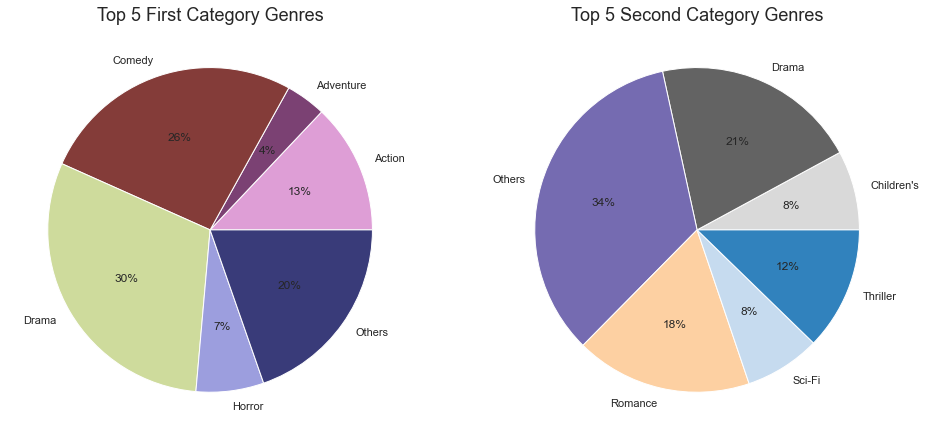

In [76]:
fig = plt.figure(figsize=(16,14))

cmap = plt.get_cmap('tab20b')
clrs = cmap(np.linspace(1, 0, 6)) 
cmap2 = plt.get_cmap('tab20c')
clrs2 = cmap2(np.linspace(1, 0, 6)) 


plt.subplot(1, 2, 1)
plt.pie(genres_pie['cat1'], labels=genres_pie['names'], colors = clrs, autopct='%.0f%%')
plt.title('Top 5 First Category Genres', fontsize = 18)

plt.subplot(1, 2, 2)
plt.pie(genres_pie2['cat2'], labels=genres_pie2['names2'], colors= clrs2, autopct='%.0f%%')
plt.title('Top 5 Second Category Genres', fontsize = 18)
plt.show()

Encara que veiem que el drama segueix sent el génere de películes més comú, al incloure en l'anàlisi la segona categoría veiem que gèneres com **Romance o Thriller** se situen en segona i tercera posició respectivament i **pujen bastant en importància**. Potser hem de considerar que aquests **gèneres poden estar infrarepresentats si només ens quedem amb la primera categoria de gènere.** 

### Exercici 3

* **Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior.**

Continuo l'exercici al notebook S03T02 EXERCICI 3.ipynb penjat al mateix repositori de Github. 